170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Train: (50000, 32, 32, 3) (50000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


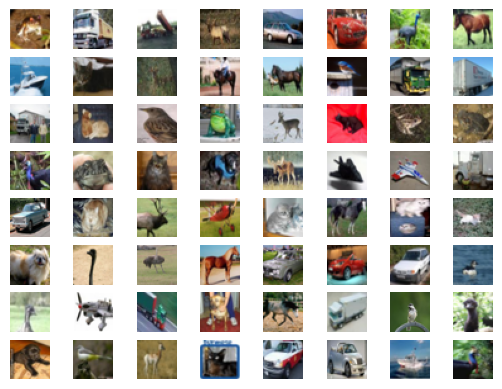

In [ ]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
(X_train, y_train), (X_test, y_test) = load_data()
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

for i in range(64):
      pyplot.subplot(8, 8, i+1)
      pyplot.axis('off')
      pyplot.imshow(X_train[i])
pyplot.show()

In [ ]:
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,LeakyReLU,Reshape,Conv2DTranspose
# from keras.utils.vis_utils import plot_model

In [ ]:
def descriminator(in_shape=(32,32,3)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3,3), padding='same', strides= (2,2)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3,3), padding='same', strides= (2,2)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(256, (3,3), padding='same', strides= (2,2)))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

In [ ]:
def load_real_samples():
  (X_train, _), (_,_) = load_data()
  X = X_train.astype('float32')
  X = (X - 127.5) / 127.5
  return X

In [ ]:
def generate_real_samples(dataset, n_samples):
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = np.ones((n_samples, 1))

    return X, y

In [ ]:
def generate_fake_samples(n_samples):
  X = np.random.uniform(-1, 1, (n_samples, 32, 32, 3))
  y = np.zeros((n_samples, 1))
  return X, y

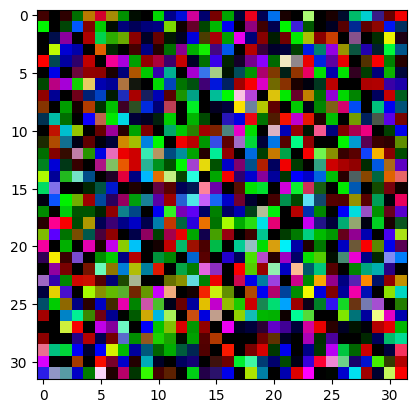

In [ ]:
t = generate_fake_samples(32)
pyplot.imshow(t[0][10])
pyplot.show()

In [ ]:
def train_discriminator(model, dataset, n_iter=50, n_batch=128):
    half_batch = int(n_batch / 2)
    for i in range(n_iter):
        X_real, y_real = generate_real_samples(dataset, half_batch)
        _, real_acc = model.train_on_batch(X_real, y_real)

        X_fake, y_fake = generate_fake_samples(half_batch)
        _, fake_acc = model.train_on_batch(X_fake, y_fake)

        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))


In [ ]:
model = descriminator()
dataset = load_real_samples()
train_discriminator(model, dataset)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


>1 real=9% fake=9%


>2 real=37% fake=34%


>3 real=47% fake=46%
>4 real=53% fake=56%
>5 real=61% fake=65%
>6 real=67% fake=70%
>7 real=72% fake=74%
>8 real=75% fake=77%
>9 real=78% fake=79%
>10 real=80% fake=81%
>11 real=82% fake=82%
>12 real=83% fake=84%
>13 real=84% fake=85%
>14 real=85% fake=86%
>15 real=86% fake=87%
>16 real=87% fake=88%
>17 real=88% fake=88%
>18 real=89% fake=89%
>19 real=89% fake=90%
>20 real=90% fake=90%
>21 real=90% fake=91%
>22 real=91% fake=91%
>23 real=91% fake=91%
>24 real=92% fake=92%
>25 real=92% fake=92%
>26 real=92% fake=92%
>27 real=92% fake=93%
>28 real=93% fake=93%
>29 real=93% fake=93%
>30 real=93% fake=93%
>31 real=93% fake=94%
>32 real=94% fake=94%
>33 real=94% fake=94%
>34 real=94% fake=94%
>35 real=94% fake=94%
>36 real=94% fake=94%
>37 real=94% fake=95%
>38 real=95% fake=95%
>39 real=95% fake=95%
>40 real=95% fake=95%
>41 real=95% fake=95%
>42 real=95% fake=95%
>43 real=95% fake=95%
>44 real=95% fake=95%
>45 real=95% fake=96%
>46 real=96% fake=96%
>47 real=96% fake=96%
>48 real=96% fake

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Conv2DTranspose, LeakyReLU

def generator(latent_dim):
    model = Sequential()

    model.add(Dense(4 * 4 * 256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 256)))

    # Upsample to 8x8x128
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Upsample to 16x16x64
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))


    # Upsample to 32x32x32
    model.add(Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Upsample to 32x32x3 (assuming RGB output image)
    model.add(Conv2DTranspose(3, (4, 4), padding='same', activation='tanh'))

    return model



In [ ]:
latent_dim = 200
model = generator(latent_dim)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 4096)                │         823,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 32, 32, 3)           │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,513,187 (5.77 MB)

 Trainable params: 1,513,187 (5.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def generate_latent_points(latent_dim, n_samples):

    x_input = np.random.randn(latent_dim * n_samples)
    return x_input.reshape(n_samples, latent_dim)

In [ ]:
def generate_fake_samples(generator, latent_dim, n_samples):

    x_input = np.random.randn(latent_dim * n_samples).reshape(n_samples, latent_dim)

    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))
    return X, y

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step  


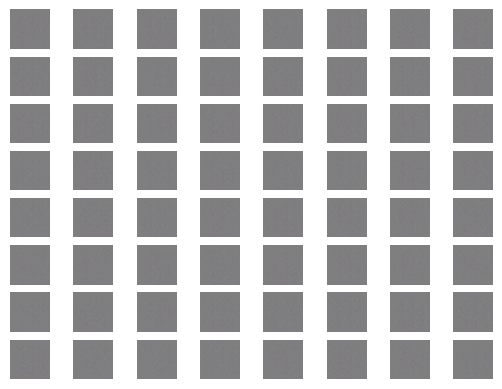

In [ ]:
latent_dim = 200
n_samples = 64
g_model = generator(latent_dim)
X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
X = (X + 1) / 2.0
for i in range(n_samples):
    pyplot.subplot(8, 8, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X[i])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

def gan_model(generator, discriminator):
    # Freeze the discriminator's layers while training the GAN
    discriminator.trainable = False

    # Define the input for the GAN model (latent space)
    gan_input = Input(shape=(latent_dim,))

    # The generator creates fake images from the latent space input
    generated_image = generator(gan_input)

    # The discriminator attempts to classify the generated images as real or fake
    gan_output = discriminator(generated_image)

    # Define the GAN model connecting the input to the output
    model = Model(gan_input, gan_output)

    # Compile the GAN model with binary crossentropy loss and Adam optimizer
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)

    return model

In [ ]:
pip install pydot graphviz

In [ ]:
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from tensorflow.keras.utils import plot_model



In [ ]:
latent_dim = 200
d_model = descriminator()
g_model = generator(latent_dim)

# Define and compile the GAN model properly
gan_model = gan_model(g_model, d_model)

# Display the summary
gan_model.summary()

# # Plot the model architecture
# from tensorflow.keras.utils import plot_model
# plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)


Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 32, 32, 3)           │       1,513,187 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 1)                   │         522,497 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,035,684 (7.77 MB)

 Trainable params: 1,513,187 (5.77 MB)

 Non-trainable params: 522,497 (1.99 MB)

In [ ]:
def train_gan(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)

    for i in range(n_epochs):
        for j in range(bat_per_epo):

            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)


            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)


            X_gan = generate_latent_points(latent_dim, n_batch)

            y_gan = np.ones((n_batch, 1))

            # Train the Generator (through the GAN model)
            g_loss = gan_model.train_on_batch(X_gan, y_gan)

            d_loss1 = d_loss1[0] if isinstance(d_loss1, list) else d_loss1
            d_loss2 = d_loss2[0] if isinstance(d_loss2, list) else d_loss2
            g_loss = g_loss[0] if isinstance(g_loss, list) else g_loss


            print('>%d, %d/%d, d1=%.3f, d2=%.3f, g=%.3f' %
                  (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))


            if (i + 1) % 10 == 0:
             generate_and_save_images(g_model, latent_dim, i, n_samples=10)




In [ ]:
if (i+1) % 10 == 0:
            print(f"Epoch {i+1}/{n_epochs} Summary:")
            print(f"  Discriminator Loss on Real Samples: {d_loss1:.3f}")
            print(f"  Discriminator Loss on Fake Samples: {d_loss2:.3f}")
            print(f"  Generator Loss: {g_loss:.3f}")

            # Print model weights summary
            print(f"\nWeights of Generator at Epoch {i+1}:")
            for layer in g_model.layers:
                weights = layer.get_weights()
                print(f"Layer {layer.name}: Weights shape: {[w.shape for w in weights]}")

            print(f"\nWeights of Discriminator at Epoch {i+1}:")
            for layer in d_model.layers:
                weights = layer.get_weights()
                print(f"Layer {layer.name}: Weights shape: {[w.shape for w in weights]}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

def generate_and_save_images(generator, latent_dim, epoch, n_samples=10):

    # Generate latent points as input for the generator
    latent_points = generate_latent_points(latent_dim, n_samples)

    generated_images = generator.predict(latent_points)


    generated_images = (generated_images + 1) / 2.0


    if not os.path.exists('generated_images'):
        os.makedirs('generated_images')


    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.axis('off')
        plt.imshow(generated_images[i])


    plt.savefig(f'generated_images/generated_epoch_{epoch+1}.png')
    plt.close()


In [ ]:
train_gan(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128)


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
>1, 1/390, d1=0.705, d2=0.699, g=0.699
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1, 2/390, d1=0.702, d2=0.700, g=0.700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1, 3/390, d1=0.702, d2=0.701, g=0.701
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1, 4/390, d1=0.702, d2=0.701, g=0.701
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
>1, 5/390, d1=0.702, d2=0.701, g=0.701
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1, 6/390, d1=0.702, d2=0.702, g=0.702
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1, 7/390, d1=0.702, d2=0.702, g=0.702
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
>1, 8/390, d1=0.703, d2=0.703, g=0.703
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1, 9/390, d1=0.704, d2=0.704, g=0.704
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
>1, 10/390, d1=0.704, d2=0.705, g=0.705
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1, 11/390, d1=0.705, d2=0.707, g=0.707
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1, 12/390, d1=0.707, d2=0.708, g=0.708
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
>1, 13/390, d1=0.708, d2=0.710, g=